**Will Loughlin**  
Individual Project: Numerics in Open Source Software  
  
My Project: **Baryrat**    
- https://github.com/c-f-h/baryrat
- Baryrat is a pure Python package that provides functions to generate rational and polynomial approximations for functions using the barycentric coordinate system. 
- The core of this package uses a class called baryrat.BarycentricRational to define functions using the barycentric coordinate system. According to the writeup this system is used because "the advantage of this representation is (often significantly) improved stability over classical approaches."
- This package provides two main algorithms to compute a rational approximation: the AAA algorithm and the BRASIL algorithm.
- The AAA algorithm describes a process to create a rational approximation in barycentric form with interpolation. 
- The BRASIL algorithm stands for Best Rational Approximation by Successive Interval Length adjustment, and describes a different method to create a rational or polynomial approximation in barycentric form. 

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import baryrat

I will include examples of two functionalities of this package: AAA and BRASIL. To do this I will consider the function:  
$$y=e^x * 5sin(2\pi * x)$$  
On the interval [0,1]. This function is visualized below:


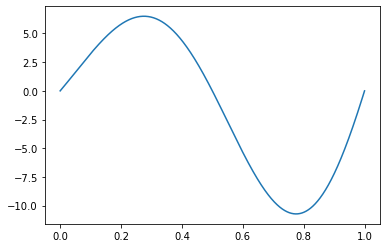

In [2]:
Z = np.linspace(0.0, 1.0, 1000)
F = np.exp(Z) * 5 * np.sin(2*np.pi*Z)
plt.plot(Z,F)

**Example 1: AAA**  
"Compute a rational approximation of F over the points Z using the AAA algorithm."

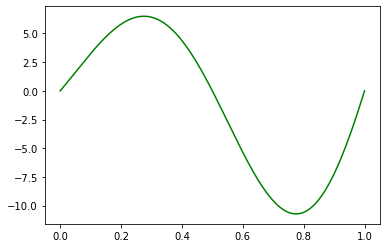

In [3]:
r = baryrat.aaa(Z, F, mmax=10)
x = np.linspace(0.0, 1.0, 1000)
y = r(x)
plt.plot(x,y,'g')

**Example 2: BRASIL Algorithm**  
"Best Rational Approximation by Successive Interval Length adjustment."

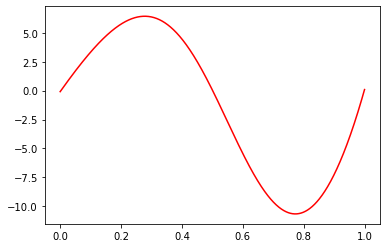

In [21]:
r = baryrat.brasil(lambda x: np.exp(x) * 5 * np.sin(2*np.pi*x), [0,1], 3)
x = np.linspace(0.0, 1.0, 1000)
y = r(x)
plt.plot(x,y,'r')

Stakeholders
- This package was created with a paper written by Clemens Hofreither, a research scientist at the Johann Radon Insitute for Computational and Applied Mathematics. 
- The paper is called An algorithm for best rational approximation based on barycentric rational interpolation and was published in January of 2021. 
- While the package includes several algorithms including AAA and polynomial approximation using Newton's algorithm, the main purpose of the package is to demonstrate the BRASIL algorithm that is the focus of the paper. 
- This software is general purpose in that it can be used by anyone who could benefit from the use of the BRASIL algorithm. 
- The package has been created and maintained by Hofreither and the most recent commit was 24 days ago. It has 14 stars and automated testing. 

Metrics and Features
- A single iteration of the BRASIL algorithm is defined as $O(n^3+k_{GS}n^2)$. According to the paper the implicit constant before the cubic term may be very small because of the optimization of linear algebra routines on modern hardware. Therefore the majority of cost in this algorithm comes from finding maxima related to the quadratic term. 
- The paper also discusses how the cost of the BRASIL algorithm can be reduced with an appropriate choice of step size and an application of Anderson Acceleration. It also suggests the use of a golden-section search in place of equispaced sampling which reduces cost but also reduces accuracy. 
- A tolerance is chosen for the BRASIL algorithm that defines the accuracy of the result. A higher tolerance results in larger computational costs as the algorithm must run through more iterations. 

![Iterations](img/Iterations.JPG)

- In this graph we can see how the deviation decreases with more iterations of the BRASIL algorithm. Each line represents a different implementation of the algorithm. (RAA(m) designates the use of Anderson Acceleration with degree m)

Question:
- The documentation for the baryrat package describes two functions, bpane and brane, that provide Best polynomial and rational approximation using Newton’s algorithm. These functions are not present when the package is installed via pip and I am curious why this would be the case. We can see the list of functions with the following code:

In [5]:
from inspect import getmembers, isfunction
print(getmembers(baryrat, isfunction))

[('_boundary_search', <function _boundary_search at 0x7fa49626dd30>), ('_compute_roots', <function _compute_roots at 0x7fa49646e940>), ('_compute_roots2', <function _compute_roots2 at 0x7fa49646e9d0>), ('_defect_matrix', <function _defect_matrix at 0x7fa49626d790>), ('_defect_matrix_arnoldi', <function _defect_matrix_arnoldi at 0x7fa49626d820>), ('_golden_search', <function _golden_search at 0x7fa49626ddc0>), ('_is_mp_array', <function _is_mp_array at 0x7fa496cec4c0>), ('_mp_qr', <function _mp_qr at 0x7fa49646eaf0>), ('_mp_svd', <function _mp_svd at 0x7fa49646ea60>), ('_nullspace_vector', <function _nullspace_vector at 0x7fa49646eb80>), ('_piecewise_mesh', <function _piecewise_mesh at 0x7fa49626db80>), ('_polynomial_weights', <function _polynomial_weights at 0x7fa49626d940>), ('_pseudo_equi_nodes', <function _pseudo_equi_nodes at 0x7fa49626d700>), ('_q', <function _q at 0x7fa49646e700>), ('aaa', <function aaa at 0x7fa49646ec10>), ('brasil', <function brasil at 0x7fa49626df70>), ('cheby

- From this list of functions it seems that all other functions given in the documentation are present. I wonder why the bpane and brane functions are not present in this package. 

Experiment Proposal:
- I think it would be an interesting experiment to compare how calculations in the barycentric coordinate system compare to the cartesian coordinate system. I don't have any experience with barycentric coordinates and I think it could be an interesting project to learn about their applications and draw backs compared to the cartesian system. 
- An extension of this could the creation of a package with an extensive collection of algorithms that function better with a barycentric coordinate system rather than cartesian.